# 1. 문제정의
- 목표 : 비만을 판단하는 모델 만들기

# 2. 데이터 수집 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
bmi = pd.read_csv('bmi_500.csv', index_col = 'Label')
bmi.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


In [6]:
bmi.loc['Normal'].head()# 정상 체중인 사람들의 정보만 확인

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67


# 3. 데이터 전처리 

In [7]:
# 전체 데이터 수, 결측치 여부, 컬럼별 정보
bmi.info()
# index:500과 column데이터 수가 같아야 결측치 오류가 없다는 것을 의미
# Dtype : object = String

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 25.6+ KB


In [8]:
# 통계값 확인, 이상치 여부
bmi.describe()
# count = 데이터 개수
# mean = 평균
# std = 표준편차(숫자가 클수로 넓게 데이터 분포)
# min = 최소값
# 50% = 순서대로 매겼을 때 50%에 있는 값 의미(평균과는 다른다.)
# max = 최대값

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


# 4. 탐색적 데이터 분석 - EDA (Exploratory Data Analysis)


In [9]:
# unique : 중복을 제거하고 하나의 값만 출력
bmi.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

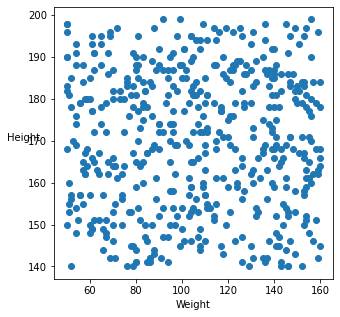

In [10]:
plt.figure(figsize = (5,5)) # 가로, 세로 크기
plt.scatter(bmi.loc[:,'Weight'], # 산점도 그리기
            bmi.loc[:,'Height']) 
plt.xlabel('Weight')
plt.ylabel('Height' ,rotation = 0)
plt.show() # 그래프 출력하기

In [11]:
# 클래스별로 다른 색으로 산점도를 그리기 위해 만듬
def myScatter(label, color): # label = 'Week','Normal','Obesity'
    tmp = bmi.loc[label] #클래스별 자료 가져오기
    plt.scatter(tmp['Weight'],
                tmp['Height'],
                color = color,
                label = label)

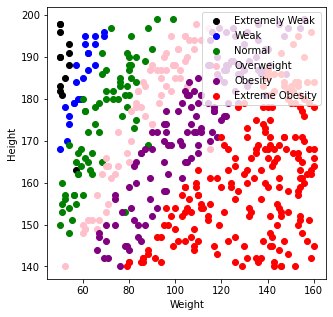

In [12]:
# 그래프 크기 지정
plt.figure(figsize=(5,5))

# 클래스별로 다른 색으로 점찍기(산점도 그리기)
myScatter('Extremely Weak','black')
myScatter('Weak','blue')
myScatter('Normal','green')
myScatter('Overweight','pink')
myScatter('Obesity','purple')
myScatter('Extreme Obesity','red')

# 클래스별로 라벨 달아주기
plt.legend(loc='upper right')

# 축에 이름달기
plt.xlabel('Weight')
plt.ylabel('Height')

# 그래프 출력
plt.show()

In [13]:
nor = bmi.loc['Normal']

In [14]:
obe = bmi.loc['Obesity']

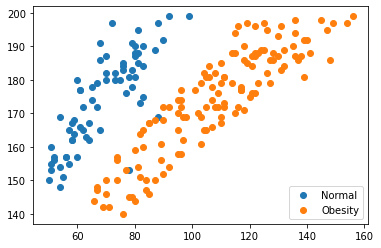

In [15]:
plt.scatter(x = nor['Weight'], y= nor['Height'], label= 'Normal')
plt.scatter(x = obe['Weight'], y= obe['Height'], label = 'Obesity')


plt.legend()
plt.show()

# 5. 모델 선택 및 하이퍼파라미터 조정

In [16]:
from sklearn.neighbors import KNeighborsClassifier   #분류모델
knn_model = KNeighborsClassifier()

In [17]:
# n_neighbors속성 : 주변 이웃중에서 가장많이 분포된 라벨을 예측값으로 사용

knn_model1 = KNeighborsClassifier(n_neighbors=15)

# 6. 학습 

In [18]:
# 데이터를 문제와 정답
# train과 test로 구분
data = pd.read_csv('bmi_500.csv')
data.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [19]:
# 문제와 정답으로 데이터 나누기
X = data.loc[:,'Height':'Weight']
y = data.loc[:,'Label']

In [20]:
X.shape,y.shape

((500, 2), (500,))

In [21]:
# X_train : 위에서 350
# X_test : 밑에서 150
# y_train : 위에서 350
# y_test : 밑에서 150

X_train = X.iloc[:350]
X_test = X.iloc[350:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((350, 2), (150, 2), (350,), (150,))

In [23]:
# 학습 : fit
knn_model.fit(X_train,y_train) # 학습용 문제,정답데이터

KNeighborsClassifier()

In [24]:
knn_model1.fit(X_train,y_train)# 학습용 문제,정답데이터

KNeighborsClassifier(n_neighbors=15)

# 7. 평가 

In [25]:
# 예측 : predict
# 평가 : score
knn_model.predict(X_test)
knn_model1.predict(X_test)

array(['Normal', 'Normal', 'Normal', 'Extreme Obesity', 'Extremely Weak',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Weak', 'Extreme Obesity', 'Extreme Obesity',
       'Obesity', 'Extreme Obesity', 'Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Overweight', 'Overweight', 'Extreme Obesity',
       'Extremely Weak', 'Normal', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Overweight', 'Extreme Obesity', 'Weak', 'Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Normal', 'Extreme Obesity',
       'Obesity', 'Overweight', 'Normal', 'Normal', 'Normal', 'Normal',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Overweight',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Overweight',
       'Obesity', 'Normal', 'Obesity', 'Obesity', 'Extreme Obesity',
       'Normal', 'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Normal', 'Obesity', 'Extreme

In [26]:
# X_test를 통해서 예측값을 뽑아냄
# y_test(실제 정답)를 통해서 예측값과 실제 정답을 비교해서 얼마나 맞췄는지를 나타냄
knn_model.score(X_test,y_test)

0.9066666666666666

In [27]:
knn_model.predict([[174,66]])

array(['Normal'], dtype=object)

In [28]:
knn_model1.score(X_test,y_test)

0.8866666666666667

In [29]:
for i in range(1,11):
    knn_model = knn_model1 = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train,y_train) # 학습용 문제,정답데이터
    result = knn_model.score(X_test,y_test)
    print('{} : {}'.format(i,result))

1 : 0.8866666666666667
2 : 0.8933333333333333
3 : 0.8933333333333333
4 : 0.8933333333333333
5 : 0.9066666666666666
6 : 0.92
7 : 0.9
8 : 0.9066666666666666
9 : 0.9133333333333333
10 : 0.9333333333333333
